In [83]:

# 0.0 start & check
import pandas
titanic0 = pandas.read_csv("train.csv")
# titanic0.head()
# print(titanic0.describe())
# The 'Age' column contains missing values.
# Three methods to fill in :
# 1. Using the median age for all passengers 
# 2. Using a regression model to predict age based on other features 
# 3. Using random sampling from existing age values


In [84]:
# 0.1 1st method, average
import pandas as pd

# Load the data
titanic = pd.read_csv("train.csv")

# Calculate the mean age
mean_age = titanic['Age'].mean()

# Fill missing Age values with the average (mean) of the existing Age values using loc
titanic.loc[titanic['Age'].isnull(), 'Age'] = mean_age

# Save the DataFrame with filled missing values to a new file named train0.csv
titanic.to_csv("train0.csv", index=False)

# Check if all missing values have been filled
# print(titanic['Age'].isnull().sum())  # If output is 0, all missing values are filled
# print(titanic.head())  # View the first few rows to confirm the data filling

# Check the new CSV file
titanic_check = pd.read_csv("train0.csv")
#print(titanic_check.head())
#print(titanic_check.describe())


In [85]:
#0.2 2nd method,regression
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data
titanic = pd.read_csv("train.csv")

# Create a boolean mask to identify missing values in the 'Age' column
age_missing = titanic['Age'].isnull()

# Select features to predict age (excluding 'Age' itself)
features = titanic[['Pclass', 'SibSp', 'Parch', 'Fare']]

# Split data into training set (with age) and prediction set (without age)
train_data = features[~age_missing]   # Data used for training (rows without missing values)
train_target = titanic['Age'][~age_missing]  # Age labels for training data
predict_data = features[age_missing]  # Data used for predicting missing values

# Train a linear regression model using the rows without missing age values
model = LinearRegression()
model.fit(train_data, train_target)

# Predict the missing age values
predicted_ages = model.predict(predict_data)

# Create a new copy of the original DataFrame and fill in the missing age values
titanic_filled = titanic.copy()
titanic_filled.loc[age_missing, 'Age'] = predicted_ages

# Save the DataFrame with filled missing values to a new file named train1.csv
titanic_filled.to_csv("train1.csv", index=False)

# Check if all missing values have been filled in the new DataFrame
# print(titanic_filled['Age'].isnull().sum())  # If output is 0, all missing values are filled
# print(titanic_filled.head())  # View the first few rows to confirm the data filling

# check2
import pandas
titanic = pandas.read_csv("train1.csv")
# titanic.head()
# print(titanic.describe())

In [86]:
#0.3 3rd method:ramdom samples
import pandas as pd
import numpy as np

# Load the data
titanic = pd.read_csv("train.csv")

# Create a boolean mask for missing Age values
age_missing = titanic['Age'].isnull()

# Use random sampling to fill in missing Age values
# Fill missing values by randomly choosing from existing Age values
titanic.loc[age_missing, 'Age'] = np.random.choice(titanic['Age'].dropna(), size=age_missing.sum())

# Save the DataFrame with filled missing values to a new file named train2.csv
titanic.to_csv("train2.csv", index=False)

# Check if all missing values have been filled
# print(titanic['Age'].isnull().sum())  # If output is 0, all missing values are filled
# print(titanic.head())  # View the first few rows to confirm the data filling

#check 3
import pandas
titanic = pandas.read_csv("train2.csv")
# titanic.head()
# print(titanic.describe())

In [87]:
print(titanic["Sex"].unique())
#Replace all the occurences of male with the number O.

titanic.loc[titanic["Sex"]=="male","Sex"]= 0
titanic.loc[titanic["Sex"]=="female","Sex"]= 1
print(titanic["Sex"].unique())

['male' 'female']
[0 1]


In [88]:
print(titanic["Embarked"].unique())
titanic.loc[titanic["Embarked"]== "S","Embarked"] = 0
titanic.loc[titanic["Embarked"]== "C","Embarked"] = 1
titanic.loc[titanic["Embarked"]== "Q","Embarked"] = 2


['S' 'C' 'Q' nan]


In [89]:
#use mode for filling the blanks

# pd.set_option('future.no_silent_downcasting', True)

most_frequent = titanic['Embarked'].mode()[0]
print(most_frequent)
titanic['Embarked'] = titanic['Embarked'].fillna(most_frequent)
print(titanic['Embarked'].isnull().sum()) 


0
0


In [90]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Define the predictor variables and the target variable
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize the logistic regression model with a maximum of 200 iterations
alg = LogisticRegression(max_iter=200)

# Set up 3-fold cross-validation
kf = KFold(n_splits=3, random_state=1, shuffle=True)

# Initialize an empty list to store predictions from each fold
all_predictions = []

# Cross-validation loop
for train_index, test_index in kf.split(titanic):
    # Split the data into training predictors and target variable
    train_predictors = titanic[predictors].iloc[train_index]
    train_target = titanic["Survived"].iloc[train_index]

    # Standardize the training predictors
    scaler = StandardScaler()
    train_predictors = scaler.fit_transform(train_predictors)

    # Fit the logistic regression model on the training data
    alg.fit(train_predictors, train_target)
    
    # Prepare the test predictors
    test_predictors = titanic[predictors].iloc[test_index]
    test_predictors = scaler.transform(test_predictors)
    
    # Get predicted probabilities for the test set (for class 1)
    fold_predictions_proba = alg.predict_proba(test_predictors)[:, 1]  # Take the probability of class 1
    
    # Make final predictions based on a threshold (0.5)
    fold_predictions = (fold_predictions_proba > 0.5).astype(int)
    
    # Append the predictions from this fold to the list
    all_predictions.append(fold_predictions)

# Concatenate predictions from all folds into a single array
all_predictions = np.concatenate(all_predictions, axis=0)

# Calculate the overall accuracy of the predictions
accuracy = sum(all_predictions == titanic["Survived"]) / len(all_predictions)

# Print the overall accuracy
print("Overall accuracy:", accuracy)


Overall accuracy: 0.5387205387205387


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]


# randomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Cross-validation
scores = cross_val_score(rf_model, titanic[predictors], titanic["Survived"], cv=5)
print("Cross-validated accuracy:", scores.mean())


Cross-validated accuracy: 0.8036281463812692


In [92]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Define predictors and target variable
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize the Random Forest model with additional parameters
rf_model = RandomForestClassifier(n_estimators=100,        # 125，manu test for the optimum result
                                   min_samples_split=10,   # Minimum samples required to split an internal node
                                   min_samples_leaf=5,     # Minimum samples required to be at a leaf node
                                   random_state=1)

# Set up KFold cross-validation
kf = KFold(n_splits=3, random_state=1, shuffle=True)

# Initialize an empty list to store cross-validation scores
cv_scores = []

# Perform KFold cross-validation
for train_index, test_index in kf.split(titanic):
    # Split the data into training and test sets
    train_data, test_data = titanic.iloc[train_index], titanic.iloc[test_index]
    
    # Fit the model on the training data
    rf_model.fit(train_data[predictors], train_data["Survived"])
    
    # Calculate the accuracy on the test set
    score = rf_model.score(test_data[predictors], test_data["Survived"])
    cv_scores.append(score)

# Calculate the mean accuracy from the cross-validation
mean_cv_score = np.mean(cv_scores)

print("Cross-validated accuracy:", mean_cv_score)


Cross-validated accuracy: 0.8181818181818182


In [93]:
import pandas as pd
import re

# Generate a FamilySize column by adding the number of siblings/spouses (SibSp) and parents/children (Parch)
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]

# Use the .apply method to create a new series that calculates the length of each name
titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))

# Define a function to extract the title from a name
def get_title(name):
    # Use a regular expression to search for a title
    title_search = re.search(r'([A-Za-z]+)\.', name)
    # If a title is found, extract and return it
    if title_search:
        return title_search.group(1)
    return None

# Extract all titles from the names and print how often each one occurs
titles = titanic["Name"].apply(get_title)

print(titles.value_counts())

title_mapping = {
    "Mr": 1,
    "Miss": 2,
    "Mrs": 3,
    "Master": 4,
    "Dr": 5,
    "Rev": 6,
    "Mlle": 7,
    "Major": 8,
    "Col": 8,       
    "Countess": 9,
    "Capt": 10,
    "Ms": 11,
    "Sir": 12,
    "Lady": 13,
    "Mme": 14,
    "Don": 15,
    "Jonkheer": 16
}

titles = titles.map(title_mapping)

print(titles.value_counts())
titanic["Title"] = titles


print(titanic[["Name", "Title"]].head())
# Print the counts of each title


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64
1     517
2     182
3     125
4      40
5       7
6       6
8       4
7       2
15      1
14      1
11      1
13      1
12      1
10      1
9       1
16      1
Name: Name, dtype: int64
                                                Name  Title
0                            Braund, Mr. Owen Harris      1
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      3
2                             Heikkinen, Miss. Laina      2
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      3
4                           Allen, Mr. William Henry      1


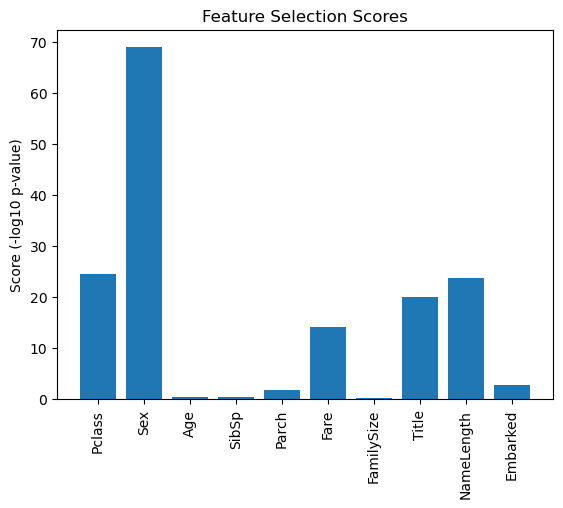

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Define the predictors
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "FamilySize", "Title", "NameLength","Embarked"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores to see which features are the best
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.ylabel('Score (-log10 p-value)')
plt.title('Feature Selection Scores')
plt.show()

# Pick only the four best features based on the scores
best_predictors = ["Pclass", "Sex", "Fare", "Title"]

# Initialize the Random Forest classifier with specified parameters
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)


In [95]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd

# Assume you have loaded and preprocessed the Titanic dataset into the variable titanic

# Initialize algorithms
algorithms = [
    (LogisticRegression(random_state=1, max_iter=200), ["Pclass", "Fare", "FamilySize", "Title", "Age", "Sex", "Embarked"]),
    (GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Fare", "FamilySize", "Title", "Age", "Sex", "Embarked"])
]

# Initialize KFold
kf = KFold(n_splits=3, shuffle=True, random_state=1)

# Initialize prediction lists
full_test_predictions = []
full_test_true_values = []

# Train and predict for each fold
for train_index, test_index in kf.split(titanic):
    train_target = titanic["Survived"].iloc[train_index]
    
    for alg, predictors in algorithms:
        # Fit the algorithm
        alg.fit(titanic[predictors].iloc[train_index, :], train_target)

        # Predict on the training set and calculate accuracy
        train_predictions = alg.predict(titanic[predictors].iloc[train_index, :])
        train_accuracy = np.sum(train_predictions == train_target.values) / len(train_target)
        print("Train Accuracy:", train_accuracy)

        # Predict on the test set
        test_predictions = alg.predict(titanic[predictors].iloc[test_index, :])
        full_test_predictions.append(test_predictions)
        full_test_true_values.append(titanic["Survived"].iloc[test_index].values)

# Combine all test predictions
predictions = np.concatenate(full_test_predictions, axis=0)
true_values = np.concatenate(full_test_true_values, axis=0)  # Combine true values

# Check length match
if len(predictions) == len(true_values):
    accuracy = np.mean(predictions == true_values)  # Calculate accuracy
else:
    print(f"Predictions length: {len(predictions)}, True values length: {len(true_values)}")

print(f"Accuracy: {accuracy}")


Train Accuracy: 0.8097643097643098
Train Accuracy: 0.8838383838383839
Train Accuracy: 0.7996632996632996
Train Accuracy: 0.8636363636363636
Train Accuracy: 0.7996632996632996
Train Accuracy: 0.8501683501683501
Accuracy: 0.8170594837261503


In [96]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd

# Assume you have loaded and preprocessed the Titanic dataset into the variable titanic

# Initialize algorithms
algorithms = [
    (LogisticRegression(random_state=1, max_iter=200), ["Pclass", "Fare", "FamilySize", "Title", "Age", "Sex", "Embarked"]),
    (GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Fare", "FamilySize", "Title", "Age", "Sex", "Embarked"])
]

# Initialize KFold
kf = KFold(n_splits=3, shuffle=True, random_state=1)

# Initialize prediction lists
full_test_predictions = []
full_test_true_values = []

# Train and predict for each fold
for train_index, test_index in kf.split(titanic):
    train_target = titanic["Survived"].iloc[train_index]
    
    for alg, predictors in algorithms:
        # Fit the algorithm
        alg.fit(titanic[predictors].iloc[train_index, :], train_target)

        # Predict on the training set and calculate accuracy
        train_predictions = alg.predict(titanic[predictors].iloc[train_index, :])
        train_accuracy = np.sum(train_predictions == train_target.values) / len(train_target)
        print("Train Accuracy:", train_accuracy)

        # Predict on the test set
        if hasattr(alg, "predict_proba"):  # Check if the algorithm has predict_proba method
            test_predictions = alg.predict_proba(titanic[predictors].iloc[test_index, :])[:, 1]  # Probabilities for the positive class
        else:
            test_predictions = alg.predict(titanic[predictors].iloc[test_index, :])  # Binary predictions
        
        full_test_predictions.append(test_predictions)
        full_test_true_values.append(titanic["Survived"].iloc[test_index].values)

# Combine all test predictions
# Weighted average of predictions without rounding
predictions = (full_test_predictions[0] * 3 + full_test_predictions[1]) / 4  # Weighted predictions
true_values = np.concatenate(full_test_true_values, axis=0)  # Combine true values

print("Predictions :", predictions)




Train Accuracy: 0.8097643097643098
Train Accuracy: 0.8838383838383839
Train Accuracy: 0.7996632996632996
Train Accuracy: 0.8636363636363636
Train Accuracy: 0.7996632996632996
Train Accuracy: 0.8501683501683501
Predictions : [0.09207493 0.58552235 0.91026849 0.24183647 0.55180036 0.04448276
 0.66605564 0.21320086 0.19349697 0.80412724 0.38220749 0.41129113
 0.28037826 0.53590884 0.82402917 0.09247282 0.6914474  0.67119854
 0.1428069  0.82723019 0.11555942 0.82961564 0.11013326 0.13008156
 0.89981754 0.28232615 0.83255954 0.29498673 0.07570333 0.0950967
 0.0954652  0.10348414 0.09482621 0.85088192 0.48944253 0.10350319
 0.09466748 0.26570776 0.05123407 0.10348414 0.06306627 0.61112144
 0.05202477 0.08023195 0.70753735 0.73068212 0.14568755 0.49349985
 0.38026599 0.16349009 0.05531714 0.37452175 0.48506048 0.19349697
 0.23129815 0.47468536 0.62072863 0.1063068  0.12220669 0.07346725
 0.05560168 0.80465133 0.08641557 0.16018379 0.20603275 0.36074437
 0.30794999 0.08294598 0.90319183 0.8840

In [97]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd

# Assume you have loaded and preprocessed the Titanic dataset into the variable titanic

# Initialize algorithms
algorithms = [
    (LogisticRegression(random_state=1, max_iter=200), ["Pclass", "Fare", "FamilySize", "Title", "Age", "Sex", "Embarked"]),
    (GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Fare", "FamilySize", "Title", "Age", "Sex", "Embarked"])
]

# Initialize KFold
kf = KFold(n_splits=3, shuffle=True, random_state=1)

# Initialize prediction lists
full_test_predictions = []
full_test_true_values = []

# Train and predict for each fold
for train_index, test_index in kf.split(titanic):
    train_target = titanic["Survived"].iloc[train_index]

    for alg, predictors in algorithms:
        # Fit the algorithm
        alg.fit(titanic[predictors].iloc[train_index, :], train_target)

        # Predict on the training set and calculate accuracy
        train_predictions = alg.predict(titanic[predictors].iloc[train_index, :])
        train_accuracy = np.sum(train_predictions == train_target.values) / len(train_target)
        print(f"Train Accuracy for {alg.__class__.__name__}: {train_accuracy}")

        # Predict on the test set
        if hasattr(alg, "predict_proba"):  # Check if the algorithm has predict_proba method
            test_predictions = alg.predict_proba(titanic[predictors].iloc[test_index, :])[:, 1]  # Probabilities for the positive class
            print(f"Test Predictions (Probabilities) for {alg.__class__.__name__} on fold: {test_predictions}")  # Debugging
            test_predictions = (test_predictions >= 0.5).astype(int)  # Convert probabilities to binary
        else:
            test_predictions = alg.predict(titanic[predictors].iloc[test_index, :])  # Binary predictions
        
        full_test_predictions.append(test_predictions)
        full_test_true_values.append(titanic["Survived"].iloc[test_index].values)

# Combine all test predictions and true values
all_test_predictions = np.concatenate(full_test_predictions, axis=0)
all_test_true_values = np.concatenate(full_test_true_values, axis=0)

# Debugging: Check the final predictions
print(f"Combined Predictions: {all_test_predictions}")
print(f"Combined True Values: {all_test_true_values}")

# Check unique values in predictions
print(f"Unique Predictions: {np.unique(all_test_predictions)}")

# Calculate accuracy
if all_test_predictions.shape[0] == all_test_true_values.shape[0]:
    accuracy = np.mean(all_test_predictions == all_test_true_values)  # Calculate accuracy
else:
    print(f"Shape mismatch! Predictions length: {all_test_predictions.shape[0]}, True values length: {all_test_true_values.shape[0]}")
    accuracy = 0.0

print(f"Final Accuracy: {accuracy}")


Train Accuracy for LogisticRegression: 0.8097643097643098
Test Predictions (Probabilities) for LogisticRegression on fold: [0.07994108 0.6179674  0.91286357 0.2500144  0.57439258 0.01740917
 0.6975629  0.21185094 0.21329588 0.81404837 0.41062434 0.44033305
 0.27485203 0.53466049 0.82266654 0.09389307 0.70626054 0.69120832
 0.12388583 0.83514506 0.10422543 0.80983764 0.07488206 0.12358828
 0.90411065 0.17241229 0.84313251 0.35121798 0.05811227 0.09196087
 0.08194319 0.09327877 0.08173487 0.85079483 0.47619632 0.09330417
 0.08152323 0.25529136 0.03520577 0.09327877 0.04260292 0.65209953
 0.03626003 0.06366583 0.70359673 0.73445643 0.16318657 0.54994468
 0.46889863 0.1790687  0.04064986 0.26998616 0.48540607 0.21329588
 0.27199417 0.52485869 0.65124446 0.11168899 0.11824217 0.02599405
 0.04408217 0.79682942 0.07239527 0.16280147 0.23830698 0.38200684
 0.29284111 0.06728453 0.92538089 0.88485561 0.01186505 0.07091349
 0.72490474 0.11357989 0.61096075 0.93532418 0.06192524 0.31478454
 0.250

In [98]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
import numpy as np
import pandas as pd

# Assume you have loaded and preprocessed the Titanic dataset into the variable titanic

# Initialize algorithms
algorithms = [
    ('logistic', LogisticRegression(random_state=1, max_iter=200)),
    ('gbc', GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3))
]

# Initialize KFold
kf = KFold(n_splits=3, shuffle=True, random_state=1)

# Initialize prediction lists
full_test_predictions = []
full_test_true_values = []

# Train and predict for each fold
for train_index, test_index in kf.split(titanic):
    train_target = titanic["Survived"].iloc[train_index]

    # Create an empty list to store predictions from each model
    fold_predictions = []

    for name, alg in algorithms:
        # Fit the algorithm
        alg.fit(titanic.iloc[train_index][["Pclass", "Fare", "FamilySize", "Title", "Age", "Sex", "Embarked"]], train_target)

        # Predict on the test set
        if hasattr(alg, "predict_proba"):
            test_predictions = alg.predict_proba(titanic.iloc[test_index][["Pclass", "Fare", "FamilySize", "Title", "Age", "Sex", "Embarked"]])[:, 1]
            fold_predictions.append(test_predictions)  # Store the probabilities for stacking
        else:
            test_predictions = alg.predict(titanic.iloc[test_index][["Pclass", "Fare", "FamilySize", "Title", "Age", "Sex", "Embarked"]])
            fold_predictions.append(test_predictions)

    # Stack the predictions from both models
    fold_predictions = np.column_stack(fold_predictions)  # Stack horizontally

    # Use a simple Logistic Regression as the meta-model for stacking
    meta_model = LogisticRegression()
    meta_model.fit(fold_predictions, titanic["Survived"].iloc[test_index])  # Train on fold predictions
    meta_predictions = meta_model.predict_proba(fold_predictions)[:, 1]  # Get probabilities for the positive class

    full_test_predictions.append(meta_predictions)
    full_test_true_values.append(titanic["Survived"].iloc[test_index].values)

# Combine all test predictions and true values
all_test_predictions = np.concatenate(full_test_predictions, axis=0)
all_test_true_values = np.concatenate(full_test_true_values, axis=0)

# Convert probabilities to binary predictions
all_test_predictions_binary = (all_test_predictions >= 0.5).astype(int)

# Debugging: Check the final predictions
print(f"Combined Predictions (Binary): {all_test_predictions_binary}")
print(f"Combined True Values: {all_test_true_values}")

# Calculate accuracy
if all_test_predictions_binary.shape[0] == all_test_true_values.shape[0]:
    accuracy = np.mean(all_test_predictions_binary == all_test_true_values)  # Calculate accuracy
else:
    print(f"Shape mismatch! Predictions length: {all_test_predictions_binary.shape[0]}, True values length: {all_test_true_values.shape[0]}")
    accuracy = 0.0

print(f"Final Accuracy: {accuracy}")


Combined Predictions (Binary): [0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1
 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0
 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 

In [99]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Assume you have loaded and preprocessed the Titanic dataset into the variable titanic

# Initialize algorithms
algorithms = [
    ('logistic', LogisticRegression(random_state=1, max_iter=200)),
    ('gbc', GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3)),
    ('rf', RandomForestClassifier(random_state=1, n_estimators=100))  # Adding Random Forest
]

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)  # Increase folds to 5 for better estimation

# Initialize prediction lists
full_test_predictions = []
full_test_true_values = []

# Train and predict for each fold
for train_index, test_index in kf.split(titanic):
    train_target = titanic["Survived"].iloc[train_index]

    # Create an empty list to store predictions from each model
    fold_predictions = []

    for name, alg in algorithms:
        # Fit the algorithm
        alg.fit(titanic.iloc[train_index][["Pclass", "Fare", "FamilySize", "Title", "Age", "Sex", "Embarked"]], train_target)

        # Predict on the test set
        if hasattr(alg, "predict_proba"):
            test_predictions = alg.predict_proba(titanic.iloc[test_index][["Pclass", "Fare", "FamilySize", "Title", "Age", "Sex", "Embarked"]])[:, 1]
            fold_predictions.append(test_predictions)  # Store the probabilities for stacking
        else:
            test_predictions = alg.predict(titanic.iloc[test_index][["Pclass", "Fare", "FamilySize", "Title", "Age", "Sex", "Embarked"]])
            fold_predictions.append(test_predictions)

    # Stack the predictions from all models
    fold_predictions = np.column_stack(fold_predictions)  # Stack horizontally

    # Use a more complex model as the meta-model for stacking
    meta_model = RandomForestClassifier(random_state=1, n_estimators=100)  # Random Forest as meta-model
    meta_model.fit(fold_predictions, titanic["Survived"].iloc[test_index])  # Train on fold predictions
    meta_predictions = meta_model.predict_proba(fold_predictions)[:, 1]  # Get probabilities for the positive class

    full_test_predictions.append(meta_predictions)
    full_test_true_values.append(titanic["Survived"].iloc[test_index].values)

# Combine all test predictions and true values
all_test_predictions = np.concatenate(full_test_predictions, axis=0)
all_test_true_values = np.concatenate(full_test_true_values, axis=0)

# Convert probabilities to binary predictions
all_test_predictions_binary = (all_test_predictions >= 0.5).astype(int)

# Debugging: Check the final predictions
print(f"Combined Predictions (Binary): {all_test_predictions_binary}")
print(f"Combined True Values: {all_test_true_values}")

# Calculate accuracy
accuracy = accuracy_score(all_test_true_values, all_test_predictions_binary)
print(f"Final Accuracy: {accuracy:.4f}")



Combined Predictions (Binary): [1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1
 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0
 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0
 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1
 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 

In [109]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Assume you have loaded and preprocessed the Titanic dataset into the variable titanic

# Initialize algorithms
algorithms = [
    ('logistic', LogisticRegression(random_state=1, max_iter=200)),
    ('gbc', GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3)),
    ('rf', RandomForestClassifier(random_state=1, n_estimators=100))  # Adding Random Forest
]

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)  # Increase folds to 5 for better estimation

# Initialize prediction lists
full_test_predictions = []
full_test_true_values = []

# Train and predict for each fold
for train_index, test_index in kf.split(titanic):
    train_target = titanic["Survived"].iloc[train_index]

    # Create an empty list to store predictions from each model
    fold_predictions = []

    for name, alg in algorithms:
        # Fit the algorithm
        alg.fit(titanic.iloc[train_index][["Pclass", "Fare", "FamilySize", "Title", "Age", "Sex", "Embarked"]], train_target)

        # Predict on the test set
        if hasattr(alg, "predict_proba"):
            test_predictions = alg.predict_proba(titanic.iloc[test_index][["Pclass", "Fare", "FamilySize", "Title", "Age", "Sex", "Embarked"]])[:, 1]
            fold_predictions.append(test_predictions)  # Store the probabilities for stacking
        else:
            test_predictions = alg.predict(titanic.iloc[test_index][["Pclass", "Fare", "FamilySize", "Title", "Age", "Sex", "Embarked"]])
            fold_predictions.append(test_predictions)

    # Stack the predictions from all models
    fold_predictions = np.column_stack(fold_predictions)  # Stack horizontally

    # Use a more complex model as the meta-model for stacking
    meta_model = RandomForestClassifier(random_state=1, n_estimators=100)  # Random Forest as meta-model
    meta_model.fit(fold_predictions, titanic["Survived"].iloc[test_index])  # Train on fold predictions
    meta_predictions = meta_model.predict_proba(fold_predictions)[:, 1]  # Get probabilities for the positive class

    full_test_predictions.append(meta_predictions)
    full_test_true_values.append(titanic["Survived"].iloc[test_index].values)

# Combine all test predictions and true values
all_test_predictions = np.concatenate(full_test_predictions, axis=0)
all_test_true_values = np.concatenate(full_test_true_values, axis=0)

# Convert probabilities to binary predictions
all_test_predictions_binary = (all_test_predictions >= 0.5).astype(int)

# Debugging: Check the final predictions
print(f"Combined Predictions (Binary): {all_test_predictions_binary}")
print(f"Combined True Values: {all_test_true_values}")

# Calculate accuracy
accuracy = accuracy_score(all_test_true_values, all_test_predictions_binary)
print(f"Final Accuracy: {accuracy:.4f}")


# Assuming 'all_test_predictions_binary' is the correct length of 418 for test set predictions
submission = pd.read_csv('gender_submission.csv')  # Load the sample submission file
submission['Survived'] = all_test_predictions_binary[:418]  # Update with your predictions
submission.to_csv('submission2.csv', index=False)  # Save to a new CSV file
print("Submission file 'submission2.csv' created successfully.")


Combined Predictions (Binary): [1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1
 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0
 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0
 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1
 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 